In [9]:
# Add relevant Jupyter notebook extensions 


import os
print(os.listdir(os.path.abspath(os.path.join(os.getcwd(), '..', '..'))))

['b1-coding-practical-mt24']


In [10]:
import importlib.util

spec = importlib.util.find_spec("uuv_mission.dynamic")
print(spec)

ModuleNotFoundError: No module named 'uuv_mission'

In [8]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/opt/anaconda3/lib/python311.zip', '/opt/anaconda3/lib/python3.11', '/opt/anaconda3/lib/python3.11/lib-dynload', '', '/Users/wangxiang/Desktop/oxford-engi-work/b1-coding-practical-mt24/b1-practical-env-1/lib/python3.11/site-packages', '/Users/wangxiang/Desktop/oxford-engi-work']


In [11]:
import os
print(os.listdir("/Users/wangxiang/Desktop/oxford-engi-work/b1-coding-practical-mt24"))

['LICENSE', 'requirements.txt', 'README.md', 'b1-practical-env-1', '.gitignore', '.git', 'data', 'notebooks', 'uuv_mission']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

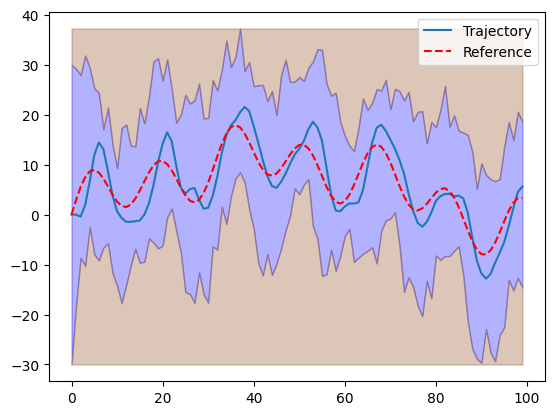

In [18]:
import sys
import os

# Add the parent directory of 'uuv_mission' to the PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import the required modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import Controller  # Import Controller from the new module

# Construct the absolute path to the 'mission.csv' file
data_dir = os.path.join(project_root, 'data')
csv_file = os.path.join(data_dir, 'mission.csv')

# Now load the mission using the absolute path
sub = Submarine()
controller = Controller(Kp=0.15, Kd=0.6)
closed_loop = ClosedLoop(sub, controller)

# Load mission from the absolute path
mission = Mission.from_csv(csv_file)

# Run the simulation
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

### Initial Testiing & Plotting

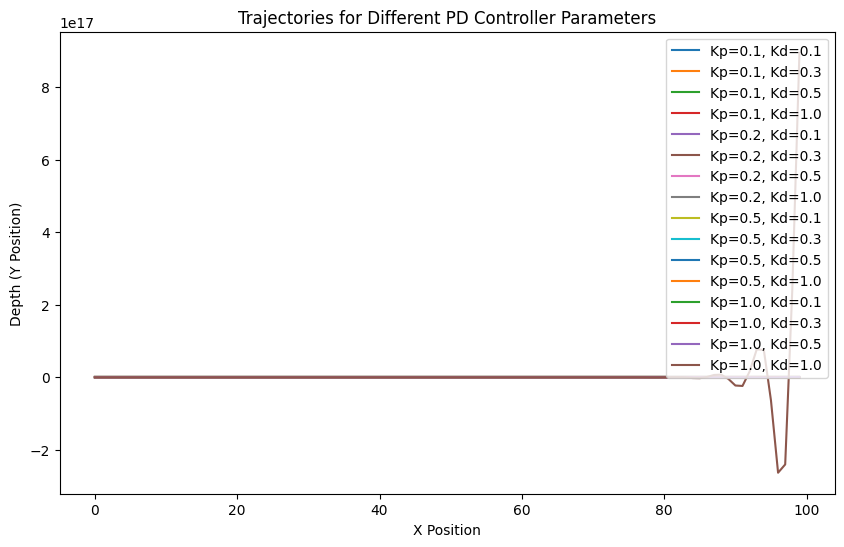

In [19]:
import matplotlib.pyplot as plt

# Define the parameter grid for Kp and Kd
Kp_values = [0.1, 0.2, 0.5, 1.0]  # Common choices for proportional gain
Kd_values = [0.1, 0.3, 0.5, 1.0]  # Common choices for derivative gain

# Initialize a dictionary to store trajectories for each parameter combination
results = {}

# Iterate over combinations of Kp and Kd
for Kp in Kp_values:
    for Kd in Kd_values:
        # Instantiate the controller with the current Kp and Kd values
        controller = Controller(Kp=Kp, Kd=Kd)
        
        # Instantiate the submarine and closed loop system
        sub = Submarine()
        closed_loop = ClosedLoop(sub, controller)
        
        # Simulate the system using random disturbances (variance=0.5)
        mission = Mission.from_csv(csv_file)  # Ensure the correct path to your CSV
        trajectory = closed_loop.simulate_with_random_disturbances(mission)
        
        # Store the trajectory in the results dictionary
        key = f"Kp={Kp}, Kd={Kd}"
        results[key] = trajectory.position

# Plotting the results for each parameter combination
plt.figure(figsize=(10, 6))

for key, position in results.items():
    plt.plot(position[:, 0], position[:, 1], label=key)

# Adding labels and legend
plt.title("Trajectories for Different PD Controller Parameters")
plt.xlabel("X Position")
plt.ylabel("Depth (Y Position)")
plt.legend()
plt.show()